# Logistic Regression - Term Deposit Subscription

### As per the given data, build a model to predict whether the client will subscribe to term deposit or not

#### Input variables:

#### Bank client data:

    1 - age : (numeric)
    2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")
    3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
    4 - education (categorical: "unknown","secondary","primary","tertiary")
    5 - default: has credit in default? (binary: "yes","no")
    6 - balance: average yearly balance, in euros (numeric)
    7 - housing: has housing loan? (binary: "yes","no")
    8 - loan: has personal loan? (binary: "yes","no")
#### Related with the last contact of the current campaign:
    9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
    10 - day: last contact day of the month (numeric)
    11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
    12 - duration: last contact duration, in seconds (numeric)
#### Other attributes:
    13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric,-1 means
                client was not previously contacted)
    15 - previous: number of contacts performed before this campaign and for this client (numeric)
    16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

#### Output variable (desired target):
    17 - y - has the client subscribed a term deposit? (binary: "yes","no")

### Project Background

Banks are spending a lot of money and time on marketing to attract more customers. But spending this much amount of money and time on all the customers will be a burden for the bank and also useless if the customer is not attracted.

In order to avoid this, the marketing plans should be more effective. One way is to understand the customers and their needs, which leads to more effective marketing plans, smart product designs and greater customer satisfaction.

The present project helps the bank to understand the customers better by using the previous data they have about their customers.

By analyzing this customer data, the bank will be able to know the behaviour of the customer. So now the bank can easily predict which type of customers are more likely to make term deposits. In this way the bank can concentrate on target customers and keep its marketing efforts on that particular customers.

### Step-1 : Import libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings as warnings
warnings.filterwarnings("ignore")
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import RFE

### Step-2 : Descriptive analysis

### Step-2.1 : Working with Dataset

#### Loading the Dataset

In [29]:
# Bank client data
client_data = pd.read_csv("bank-full.csv",sep=";")

#### Exploring the dataset

In [30]:
# Displaying first ten records
client_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [31]:
# Shape of the data
client_data.shape

(45211, 17)

In [32]:
# Summary of the data
client_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [33]:
# Check the data types
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Step-2.2 : Handling missing values

In [34]:
# Check for Null values
client_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [35]:
# Check for duplicate values
client_data[client_data.duplicated()].shape

(0, 17)

In [36]:
client_data[client_data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


### Step-2.3 : Exploring data using Visualisation

#### Differentiate Categorical and Numerical features

In [37]:
client_data_cat = client_data.select_dtypes(include=['object'])
client_data_cat

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [38]:
numerical_features=[feature for feature in client_data.columns if client_data[feature].dtypes != 'O']
numerical_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [39]:
client_data_num = client_data[numerical_features]
client_data_num

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


#### Differentiate Discrete and Continuous features
+ Numerical variables are usually of 2 types 
+ Discrete features and continuous features

In [40]:
discrete_feature=[feature for feature in numerical_features if len(client_data[feature].unique())<25]
discrete_feature

[]

In [41]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
continuous_feature

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [42]:
client_data_cont = client_data_num[continuous_feature]
client_data_cont

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


#### Visualizing continuous features

#### Histogram

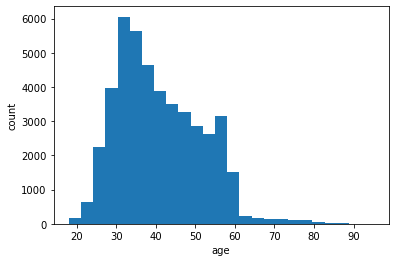

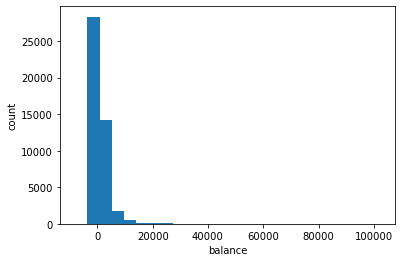

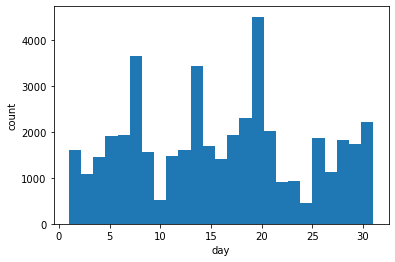

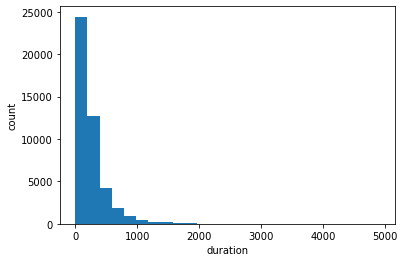

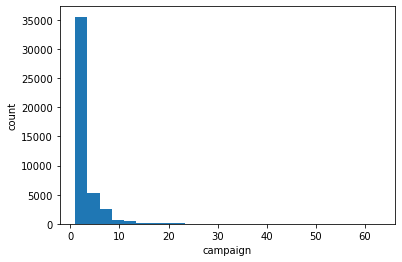

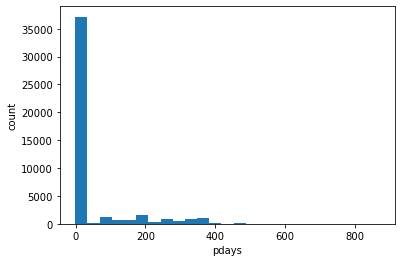

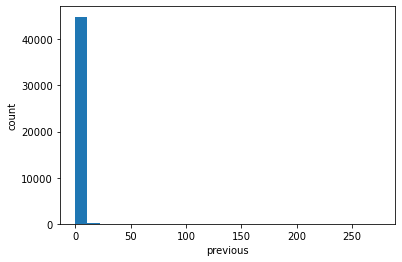

In [43]:
for feature in client_data_cont.columns:
    plt.figure()
    plt.hist(client_data_cont[feature],bins=25)
    plt.xlabel(feature)
    plt.ylabel("count")

#### Boxplot

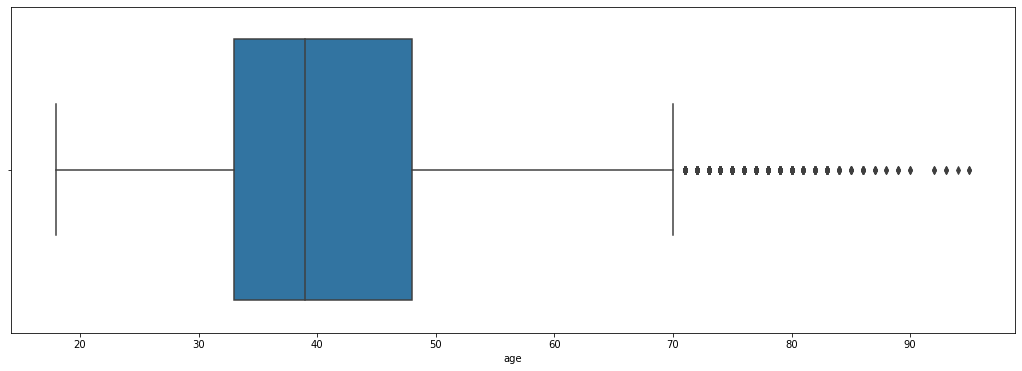

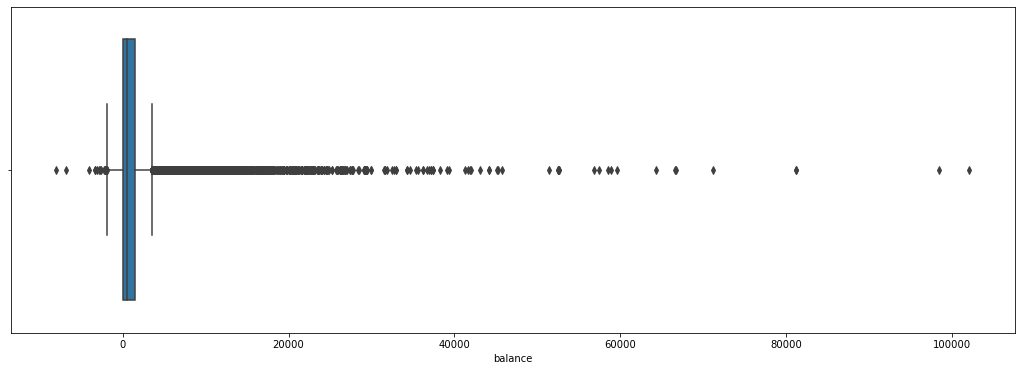

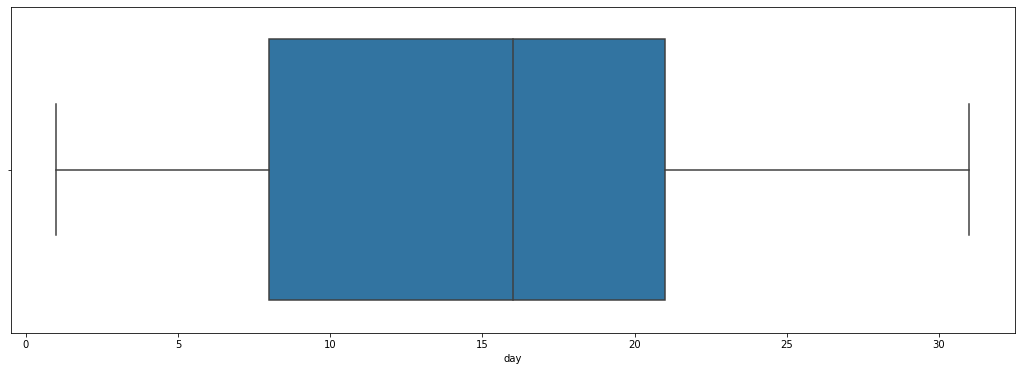

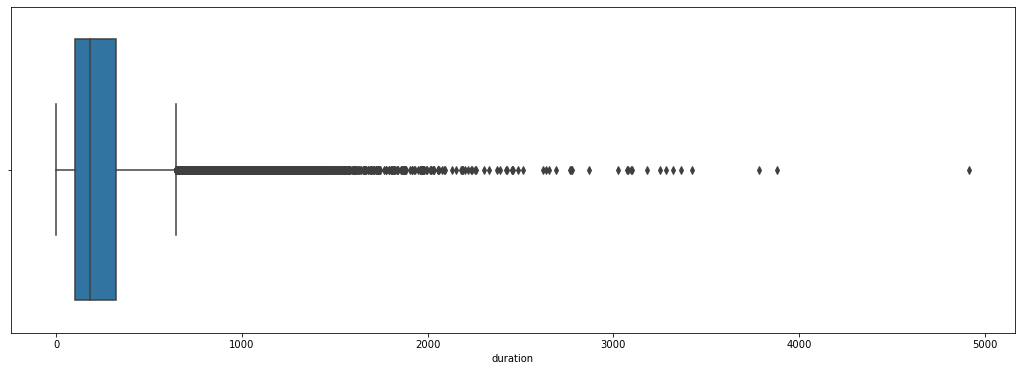

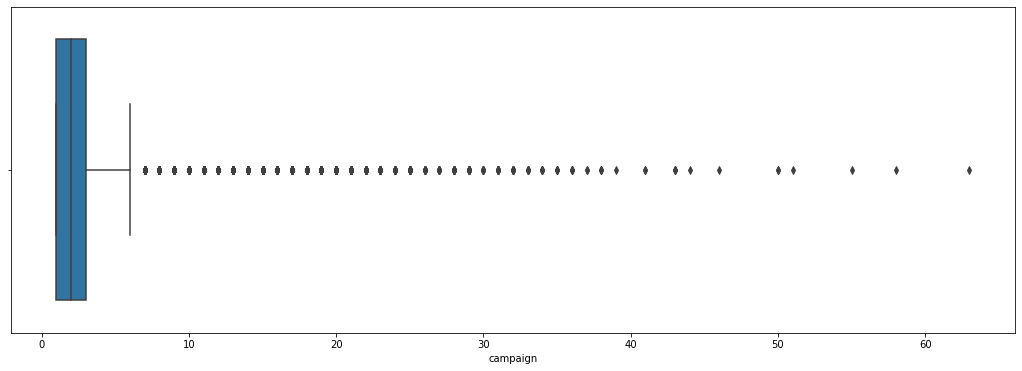

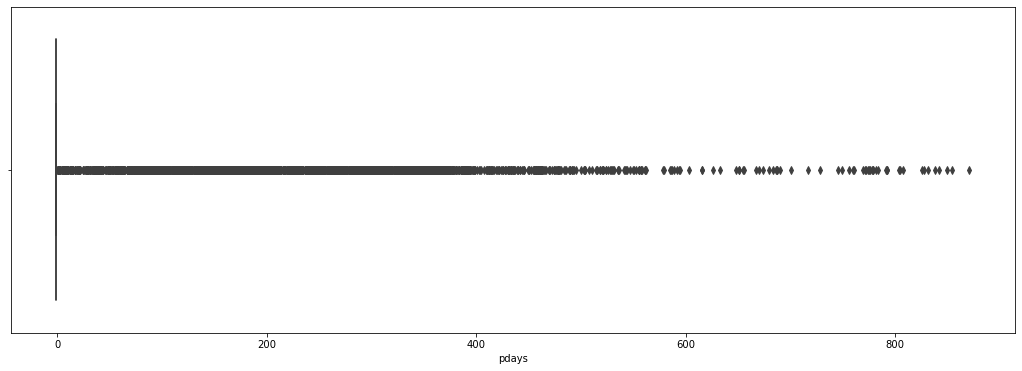

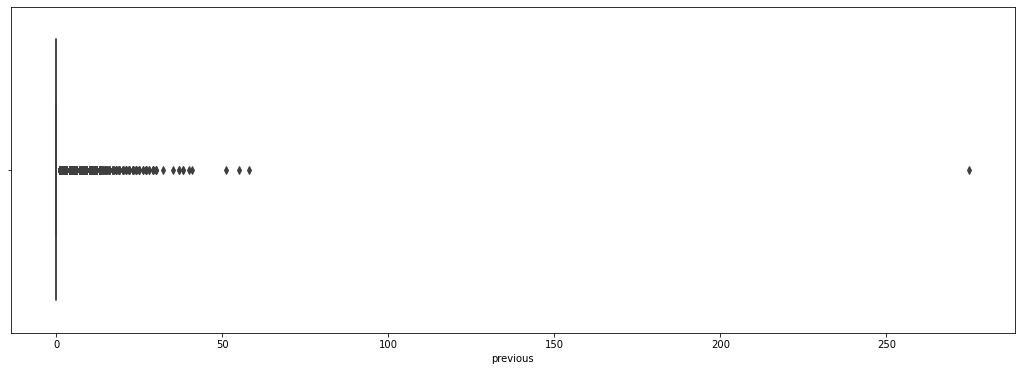

In [44]:
for feature in client_data_cont.columns:
    plt.figure(figsize=(18,6))
    sb.boxplot(client_data_cont[feature])

#### Correlation and Heat map

In [45]:
# Checking for Correlation between variables
client_data_cont.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


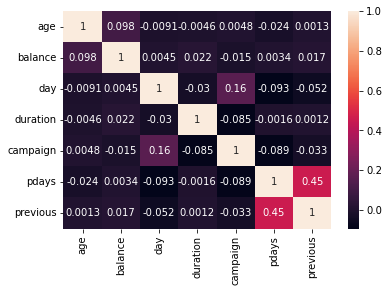

In [46]:
sb.heatmap(client_data_cont.corr(),annot=True)
plt.show()

#### Visualizing catagorical features

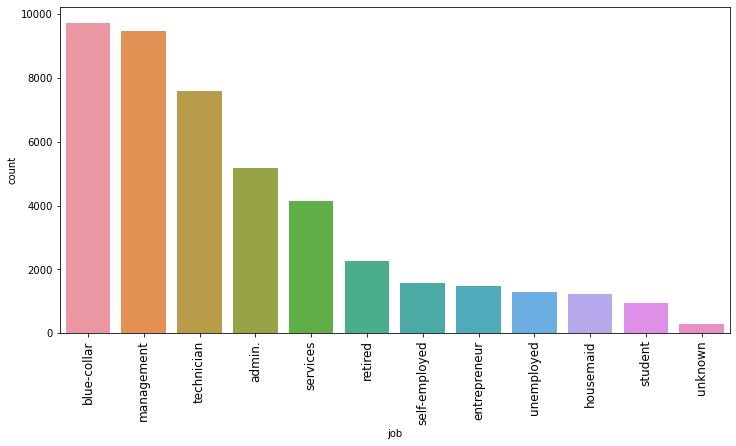

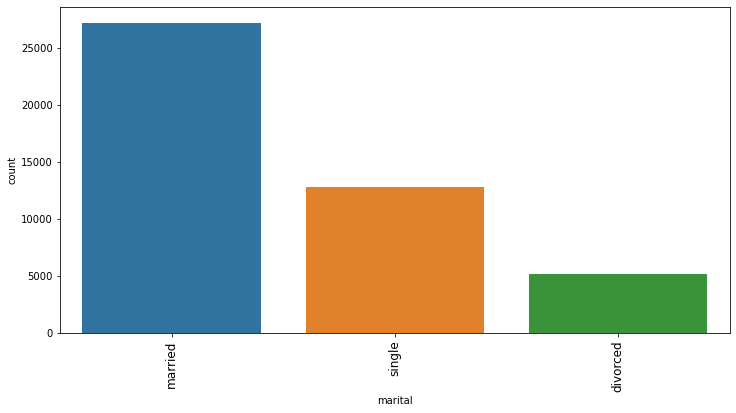

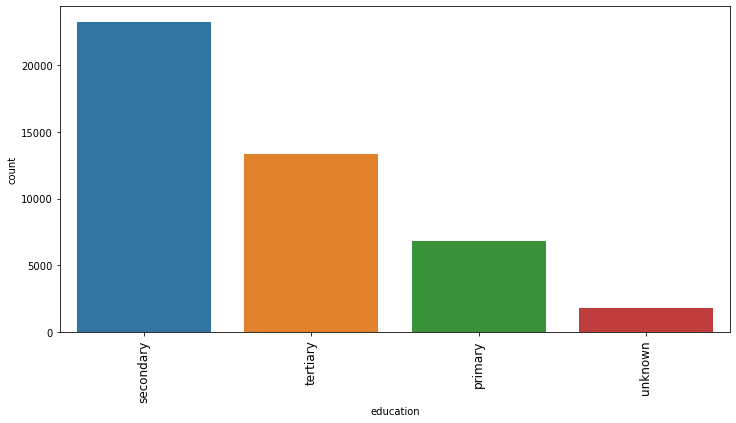

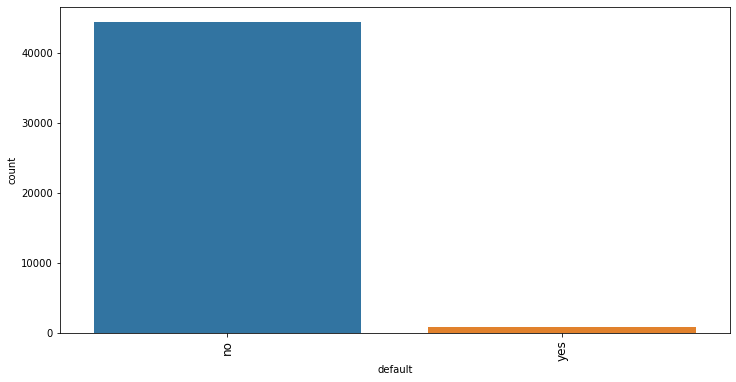

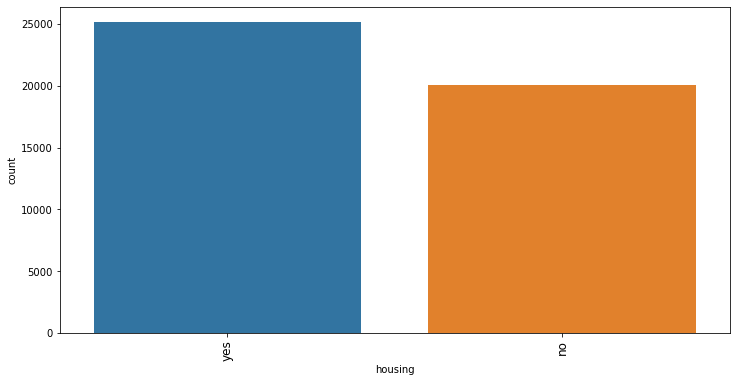

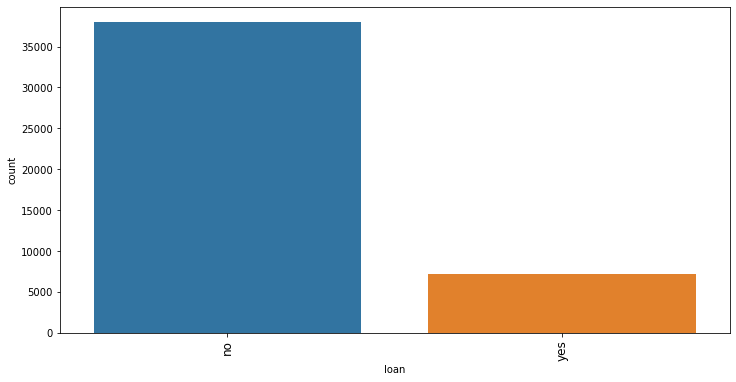

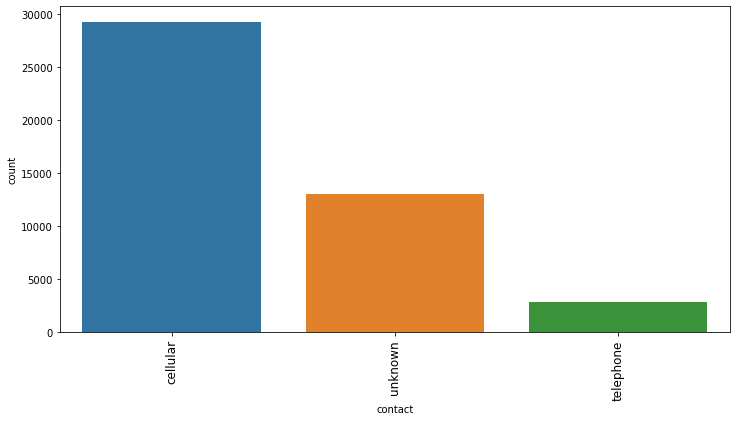

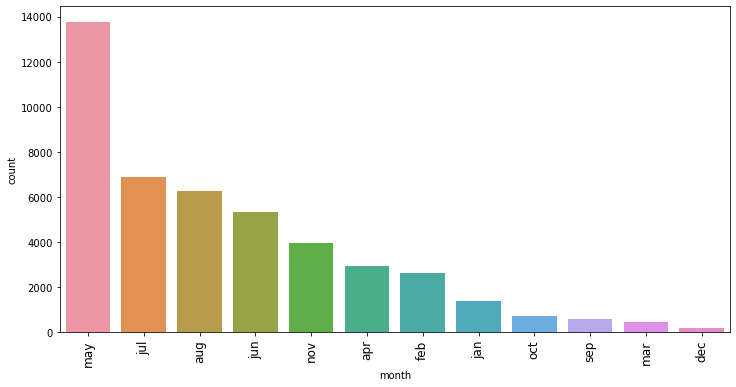

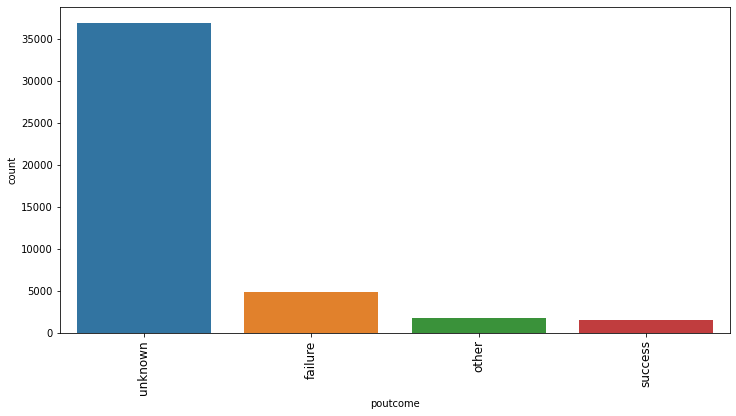

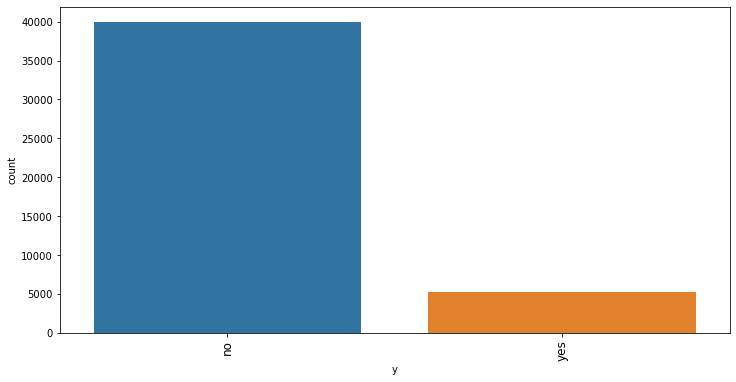

In [47]:
for i in client_data_cat.columns:
    plt.figure(figsize=(12,6))
    sb.countplot(x=i, data=client_data_cat, 
              order=client_data_cat[i].value_counts().index)
    plt.xticks(rotation = 90,fontsize = 12)
plt.show()

<Figure size 864x432 with 0 Axes>

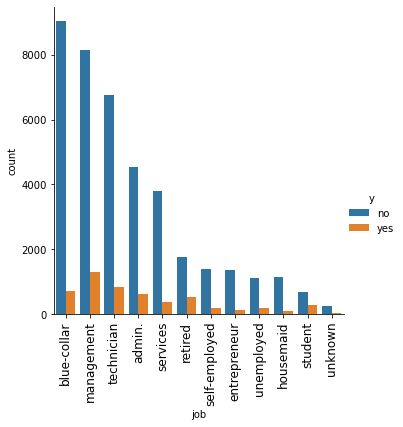

<Figure size 864x432 with 0 Axes>

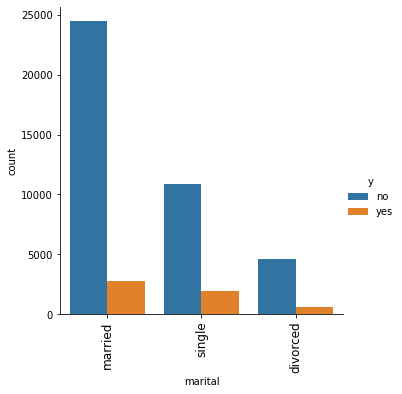

<Figure size 864x432 with 0 Axes>

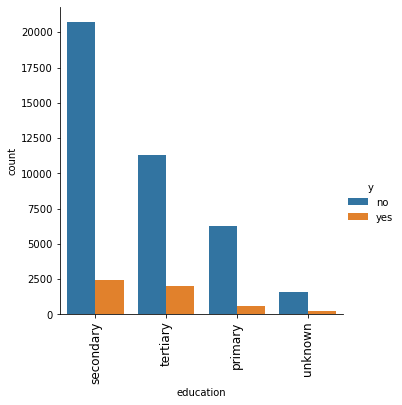

<Figure size 864x432 with 0 Axes>

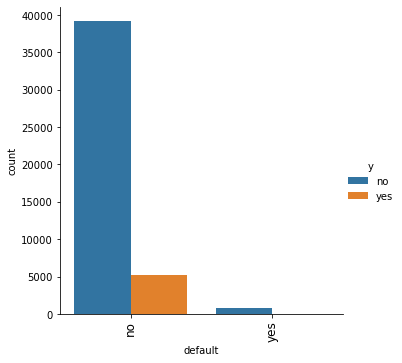

<Figure size 864x432 with 0 Axes>

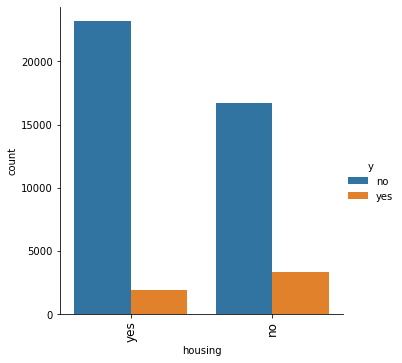

<Figure size 864x432 with 0 Axes>

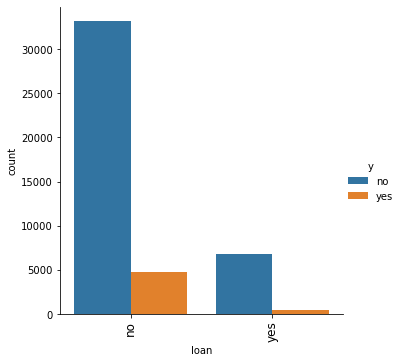

<Figure size 864x432 with 0 Axes>

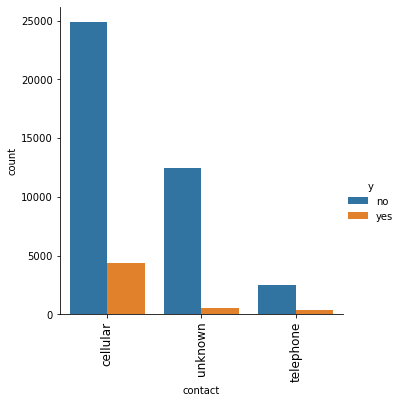

<Figure size 864x432 with 0 Axes>

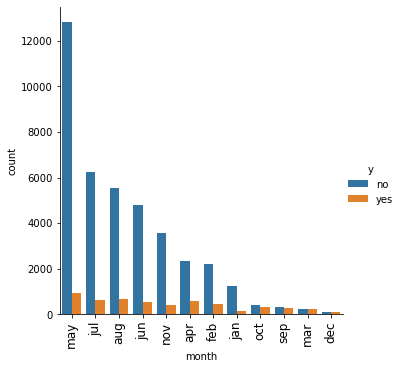

<Figure size 864x432 with 0 Axes>

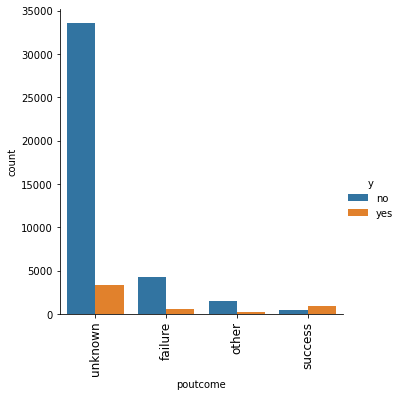

<Figure size 864x432 with 0 Axes>

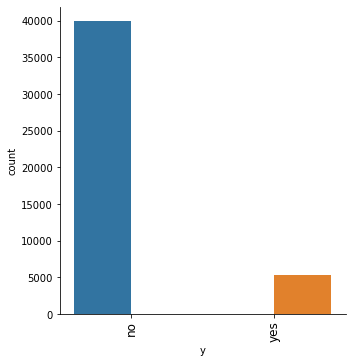

In [48]:
for i in client_data_cat.columns:
    plt.figure(figsize=(12,6))
    sb.catplot(data=client_data_cat,x=i,hue="y",kind='count',
              order=client_data_cat[i].value_counts().index)
    plt.xticks(rotation = 90,fontsize = 12)
plt.show()

#### Here the dataset contains more no. of observations related to target feature "no" rather than "yes". This is an imbalanced dataset and may lead to bias. After building the model there is a chance that the model may predict "yes" as "no" as the model is trained for more no. of observations of one particular class. So, we have to make the dataset balanced.

### Step-3 : Clean the dataset

#### There are values like 'unknown' in some of the features. These values have to be treated.

In [49]:
cols = [col for col in client_data.columns]
col_missing = []
for col in cols:
    if 'unknown' in client_data[col].values:
        col_missing.append(col)
        
print("Columns with Unknown Values -",col_missing) 

Columns with Unknown Values - ['job', 'education', 'contact', 'poutcome']


In [50]:
client_data[['job','education','contact','poutcome']] = client_data[['job','education','contact','poutcome']].replace(['unknown'],'other')

In [51]:
client_data.poutcome.value_counts()

other      38799
failure     4901
success     1511
Name: poutcome, dtype: int64

#### Converting categorical variables into numerical using Custom Binary Encoding of variables

In [52]:
client_data['default'] = np.where(client_data['default'].str.contains("yes"), 1, 0)
client_data['housing'] = np.where(client_data['housing'].str.contains("yes"), 1, 0)
client_data['loan'] = np.where(client_data['loan'].str.contains("yes"), 1, 0)
client_data['y'] = np.where(client_data['y'].str.contains("yes"), 1, 0)
client_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,other,5,may,261,1,-1,0,other,0
1,44,technician,single,secondary,0,29,1,0,other,5,may,151,1,-1,0,other,0
2,33,entrepreneur,married,secondary,0,2,1,1,other,5,may,76,1,-1,0,other,0
3,47,blue-collar,married,other,0,1506,1,0,other,5,may,92,1,-1,0,other,0
4,33,other,single,other,0,1,0,0,other,5,may,198,1,-1,0,other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,other,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,other,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,other,0


In [53]:
client_data_cat = client_data.select_dtypes(include=['object'])
client_data_cat

,job,marital,education,contact,month,poutcome
0,management,married,tertiary,other,may,other
1,technician,single,secondary,other,may,other
2,entrepreneur,married,secondary,other,may,other
3,blue-collar,married,other,other,may,other
4,other,single,other,other,may,other
...,...,...,...,...,...,...
45206,technician,married,tertiary,cellular,nov,other
45207,retired,divorced,primary,cellular,nov,other
45208,retired,married,secondary,cellular,nov,success
45209,blue-collar,married,secondary,telephone,nov,other


#### Converting categorical variables into numerical using One-hot encoding

In [54]:
# Dummy variables of all categorical columns
dummies = pd.get_dummies(client_data_cat)
dummies

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
45207,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
45208,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45209,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [55]:
# Concatenating two dataframes
client_data = pd.concat([client_data,dummies],axis=1)
client_data.drop(columns=client_data_cat.columns,axis=1,inplace=True)
client_data

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,1,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,1,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,1,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,1,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,1,0,0,0,1,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,1,0,0,0,1,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,1,0,0,0,0,1
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,1,0,0,0,1,0


In [29]:
pd.set_option("display.max.columns", None)
client_data

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,contact_cellular,contact_other,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
45207,71,0,1729,0,0,17,456,2,-1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
45208,72,0,5715,0,0,17,1127,5,184,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
45209,57,0,668,0,0,17,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [56]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int32
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_other            4

In [30]:
client_data.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_other',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_other',
       'education_primary', 'education_secondary', 'education_tertiary',
       'contact_cellular', 'contact_other', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success'],
      dtype='object')

#### Changing the datatype to integers

In [31]:
client_data[['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_other',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_other',
       'education_primary', 'education_secondary', 'education_tertiary',
       'contact_cellular', 'contact_other', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success']]=client_data[['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_other',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_other',
       'education_primary', 'education_secondary', 'education_tertiary',
       'contact_cellular', 'contact_other', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success']].astype('int64')
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_admin.           45211 non-null  int64
 12  job_blue-collar      45211 non-null  int64
 13  job_entrepreneur     45211 non-null  int64
 14  job_housemaid        45211 non-null  int64
 15  job_management       45211 non-null  int64
 16  job_other            4

In [32]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
client_data=client_data.replace(order)

#### Standardising values

In [33]:
from sklearn.preprocessing import StandardScaler

client_data_std= client_data.copy()
column_name= ['balance','age','duration']
features = client_data_std[column_name]
rest = [columns for columns in client_data.columns if columns not in column_name]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
client_data_std = pd.DataFrame(features, columns = column_name)
client_data_std[rest] = client_data[rest]
client_data_std.head()

,balance,age,duration,default,housing,loan,day,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,contact_cellular,contact_other,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,0.256419,1.606965,0.011016,0,1,0,5,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,-0.437895,0.288529,-0.416127,0,1,0,5,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,-0.446762,-0.747384,-0.707361,0,1,1,5,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0.047205,0.571051,-0.645231,0,1,0,5,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,-0.447091,-0.747384,-0.233620,0,0,0,5,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


### Step-4 : Feature Selection

### Step-4.1 : Split the data into training and testing data

In [34]:
x = client_data_std.drop('y', 1)
y = client_data_std['y']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [36]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (36168, 47)
Shape of X_test:  (9043, 47)
Shape of y_train:  (36168,)
Shape of y_test (9043,)


### Step-4.2 : Recursive Feature Elimination

In [37]:
# Model to Test
classifier = LogisticRegression()

In [38]:
# Select best features using recursive feature elimination technique that influence the model
rfe = RFE(classifier,n_features_to_select=15,step=1)
rfe = rfe.fit(x_train, y_train)

In [39]:
print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False  True False False False  True False
  True  True  True  True False  True  True  True  True  True  True]
[22 32  1 30  1  3 31 19 33 28 13 17 12  8 25 16  6 24 18  1 27 15 20  9
 29 26  7 23 14  4  1  5 21  2  1 11  1  1  1  1 10  1  1  1  1  1  1]


In [40]:
col1 = x_train.columns[rfe.support_]

In [41]:
x_train = x_train[col1]
x_train

,duration,housing,job_student,contact_other,month_dec,month_jan,month_jul,month_jun,month_mar,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
13932,1.808900,0,0,0,0,0,1,0,0,0,0,0,0,1,0
9894,-0.757841,0,0,1,0,0,0,1,0,0,0,0,0,1,0
39946,-0.606400,1,0,0,0,0,0,1,0,0,0,0,1,0,0
9217,-0.043348,1,0,1,0,0,0,1,0,0,0,0,0,1,0
4124,-0.466608,1,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30403,-0.851036,0,0,0,0,0,0,0,0,0,0,0,0,1,0
21243,-0.097711,1,0,0,0,0,0,0,0,0,0,0,0,1,0
42613,0.011016,0,0,0,0,1,0,0,0,0,0,0,0,1,0
43567,-0.423893,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Step-5 : Build a Logistic regression model with selected columns

In [42]:
# Model to Test
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [43]:
x_test = x_test[col1]
x_test

,duration,housing,job_student,contact_other,month_dec,month_jan,month_jul,month_jun,month_mar,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
14001,-0.649114,1,0,0,0,0,1,0,0,0,0,0,0,1,0
32046,3.164108,1,0,0,0,0,0,0,0,0,0,0,0,1,0
13318,-0.058880,0,0,0,0,0,1,0,0,0,0,0,0,1,0
42991,-0.594750,1,0,0,0,0,0,0,0,0,0,0,1,0,0
14237,0.286718,1,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18448,1.820549,0,0,0,0,0,1,0,0,0,0,0,0,1,0
6654,-0.788906,1,0,1,0,0,0,0,0,0,0,0,0,1,0
17106,-0.808322,0,0,0,0,0,1,0,0,0,0,0,0,1,0
9025,2.150614,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [44]:
classifier.predict_proba(x_test)

array([[0.98149097, 0.01850903],
       [0.32259138, 0.67740862],
       [0.93540238, 0.06459762],
       ...,
       [0.97031264, 0.02968736],
       [0.65047199, 0.34952801],
       [0.95111051, 0.04888949]])

In [45]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
y_pred_df=pd.DataFrame({'actual_y':y_test,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
14001,0,0
32046,1,1
13318,0,0
42991,0,0
14237,0,0
...,...,...
18448,1,0
6654,0,0
17106,0,0
9025,1,0


In [47]:
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix) 

[[7763  217]
 [ 697  366]]


In [48]:
pd.crosstab(y_test,y_pred)  

col_0,0,1
y,,
0,7763,217
1,697,366


In [49]:
accuracy = sum(y_test==y_pred)/y_test.shape[0]
accuracy

0.8989273471193188

#### Therefore the accuracy of the model is good.

In [50]:
CR = classification_report (y_test, y_pred)
print (CR)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.63      0.34      0.44      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.66      0.69      9043
weighted avg       0.88      0.90      0.89      9043



#### Observation
+ Here the accuracy of the model is 90%, which means out of all the observations the model is predicting 90% as correct.
+ The recall value of '0'class(who does not take term deposit) is 97%. Which means out of all the '0' class, the model is predicting 97% as'0' correctly.
+ The recall value of '1'class(who take term deposit) is 34%, which means out of all the '1' class the model is predicting only 34% as '1' correctly.
+ But here we require to correctly predict persons who take term deposit. We are more focused on persons who take term deposit, but the model is not predicting that correctly. So we have to increase the accuracy of the model in predicting persons who take term deposit correctly.
+ From the report, we can observe that the support for 0 (i.e. "no") is more than 1 (i.e. "yes"). This clearly shows that the dataset is imbalanced. 
+ This is the problem why the model is predicting '0' class more correctly than '1' class as the model is trained more on '0' class. So we have to change the weightage while creating the model and train the model more on '1' class.

### Step-6 : Balancing the dataset and building the model

In [51]:
weightage=np.round((1063/7980)/(1+(1063/7980)),3)
print(weightage)
weightage1 = 1-weightage
print(weightage1)

0.118
0.882


In [52]:
classifier1=LogisticRegression(class_weight={0:weightage,1:weightage1})
classifier1.fit(x_train,y_train)

LogisticRegression(class_weight={0: 0.118, 1: 0.882})

In [53]:
classifier1.coef_

array([[ 1.4788712 , -0.84633909,  0.8813477 , -1.92507632,  1.17516393,
        -0.5813452 , -0.77251938,  0.806827  ,  2.34454054, -0.41652508,
         1.81000826,  1.60642073, -0.72190096, -0.99838335,  1.72033021]])

In [54]:
classifier1.predict_proba(x_test)

array([[0.93685756, 0.06314244],
       [0.02378457, 0.97621543],
       [0.72669507, 0.27330493],
       ...,
       [0.88955925, 0.11044075],
       [0.12521903, 0.87478097],
       [0.79897544, 0.20102456]])

In [55]:
y_pred = classifier1.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [56]:
y_pred_df=pd.DataFrame({'actual_y':y_test,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
14001,0,0
32046,1,1
13318,0,0
42991,0,0
14237,0,0
...,...,...
18448,1,1
6654,0,0
17106,0,0
9025,1,1


In [57]:
pd.crosstab(y_test,y_pred)  

col_0,0,1
y,,
0,6749,1231
1,237,826


In [58]:
#type(y_pred)
accuracy = sum(y_test==y_pred)/y_test.shape[0]
accuracy

0.8376644918721663

#### Therefore the accuracy of the model is good.

In [59]:
CR1 = classification_report (y_test, y_pred)
print (CR1)

              precision    recall  f1-score   support

           0       0.97      0.85      0.90      7980
           1       0.40      0.78      0.53      1063

    accuracy                           0.84      9043
   macro avg       0.68      0.81      0.72      9043
weighted avg       0.90      0.84      0.86      9043



### Step-7 : Comparing two models

In [60]:
print("Without weightage\n",CR)
print("With weightage\n",CR1)

Without weightage
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.63      0.34      0.44      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.66      0.69      9043
weighted avg       0.88      0.90      0.89      9043

With weightage
               precision    recall  f1-score   support

           0       0.97      0.85      0.90      7980
           1       0.40      0.78      0.53      1063

    accuracy                           0.84      9043
   macro avg       0.68      0.81      0.72      9043
weighted avg       0.90      0.84      0.86      9043



#### Here we can see that the model with weightage has more recall value. So consider this model as it is helping in predicting our target class correctly.

### Step-8 : ROC Curve and AUC

In [61]:
auc=roc_auc_score(y_test,classifier1.predict(x_test))
auc

0.8113927221628862

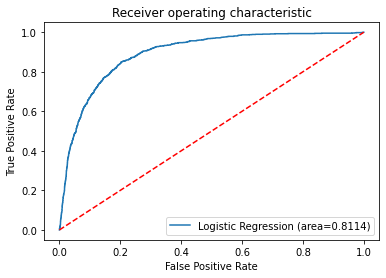

In [62]:
fpr, tpr, thresholds = roc_curve(y_test,classifier1.predict_proba(x_test)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.4f)'% auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### As the area under curve is 0.8114. The model is 81.1% accurate in predicting the '1' class.

In [63]:
logit = sm.Logit(y_test, x_test)   

In [64]:
logit.fit().summary()  

Optimization terminated successfully.
         Current function value: 0.252263
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 9043
Model:                          Logit   Df Residuals:                     9028
Method:                           MLE   Df Model:                           14
Date:                Tue, 29 Nov 2022   Pseudo R-squ.:                  0.3032
Time:                        17:43:39   Log-Likelihood:                -2281.2
converged:                       True   LL-Null:                       -3273.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
duration             1.0279      0.035     29.179      0.000       0.959       1.097
housing             -0.5637      0.085     -6.651      0.000      -0.730      -0.398
job_student          1.0349      0.197      5.260      0.000       0.649       1.420
contact_other       -1.3756      0.139     -9.918      0.000      -1.647      -1.104
month_dec            1.2290      0.444      2.770      0.006       0.359       2.099
month_jan           -1.0728      0.279     -3.852      0.000      -1.619      -0.527
month_jul           -0.6015      0.125     -4.830      0.000      -0.846      -0.357
month_jun            0.6871      0.151      4.543      0.000       0.391       0.984
month_mar            1.9267      0.249      7.734      0.000       1.438       2.415
month_nov           -0.4835      0.158     -3.060      0.002      -0.793      -0.174
month_oct            1.5459      0.204      7.573      0.000       1.146       1.946
month_sep            1.1528      0.226      5.092      0.000       0.709       1.596
poutcome_failure    -1.8591      0.127    -14.695      0.000      -2.107      -1.611
poutcome_other      -2.0856      0.074    -28.075      0.000      -2.231      -1.940
poutcome_success     0.3032      0.136      2.229      0.026       0.037       0.570
====================================================================================
"""

#### All the features are significant to the model as the P-values are <0.05. So there is no necessity to remove any feature.

### Step-9 : Optimising the threshold value

In [65]:
fpr 

array([0.        , 0.        , 0.        , ..., 0.99912281, 0.99937343,
       1.        ])

In [66]:
tpr  

array([0.00000000e+00, 9.40733772e-04, 4.70366886e-03, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [67]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(classifier1.predict_proba(x_test)[:,1]>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls  

,thresholds,accuracy
322,0.895583,0.900807
321,0.895762,0.900807
319,0.897983,0.900807
318,0.899617,0.900697
323,0.895070,0.900697
...,...,...
3372,0.013378,0.119208
3374,0.013192,0.119208
3375,0.011954,0.118434
3376,0.010723,0.118324


In [68]:
from numpy import argmax
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh)) 

Best Threshold=0.403919


In [69]:
preds = np.where(classifier1.predict_proba(x_test)[:,1] > best_thresh, 1, 0)
print(classification_report(y_test,preds))   

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      7980
           1       0.36      0.85      0.50      1063

    accuracy                           0.80      9043
   macro avg       0.67      0.82      0.69      9043
weighted avg       0.90      0.80      0.83      9043



### Conclusion:
+ So here the recall value is 0.85 for '1' class which means that the accuracy to predict '1' class is 85%. 
+ The accuracy of the model is also 80 % which is greater than 75%, so it is a good model to rely on.